In [16]:
!pip install arch
!pip install yfinance
!pip install pmdarima

In [0]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import yfinance
import warnings; warnings.filterwarnings("ignore")

In [18]:
raw_data = yfinance.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", 
                             start="1994-01-07", end="2019-09-1", 
                             interval="1d", group_by="ticker", auto_adjust=True, 
                             treads=True)

[*********************100%***********************]  4 of 4 completed


In [0]:
df_comp = raw_data.copy()

In [0]:
df_comp["spx"] = df_comp["^GSPC"].Close[:]
df_comp["dax"] = df_comp["^GDAXI"].Close[:]
df_comp["ftse"] = df_comp["^FTSE"].Close[:]
df_comp["nikkei"] = df_comp["^N225"].Close[:]

In [0]:
df_comp = df_comp.iloc[1:]
del df_comp["^GSPC"]
del df_comp["^GDAXI"]
del df_comp["^FTSE"]
del df_comp["^N225"]

df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

In [0]:
df_comp["ret_spx"] = df_comp.spx.pct_change(1)*100
df_comp["ret_ftse"] = df_comp.ftse.pct_change(1)*100
df_comp["ret_dax"] = df_comp.dax.pct_change(1)*100
df_comp["ret_nikkei"] = df_comp.nikkei.pct_change(1)*100

In [0]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [0]:
model_ar = ARIMA(df.ftse, order=(1,0,0))
results_ar = model_ar.fit()

In [25]:
df.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
,,,,,,,,
Date,,,,,,,,
2014-07-09,1972.829956,9808.200195,6718.000000,15302.650391,0.464427,-0.304222,0.363568,-0.076789
2014-07-10,1964.680054,9659.129883,6672.399902,15216.469727,-0.413107,-0.678775,-1.519854,-0.563175
2014-07-11,1967.569946,9666.339844,6690.200195,15164.040039,0.147092,0.266775,0.074644,-0.344559
2014-07-14,1977.099976,9783.009766,6746.100098,15296.820312,0.484355,0.835549,1.206971,0.875626
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,-0.193210,-0.527714,-0.650103,0.642878


In [0]:
start_date = "2014-07-15"
end_date = "2015-01-01"

In [0]:
df_pred = results_ar.predict(start=start_date, end=end_date)

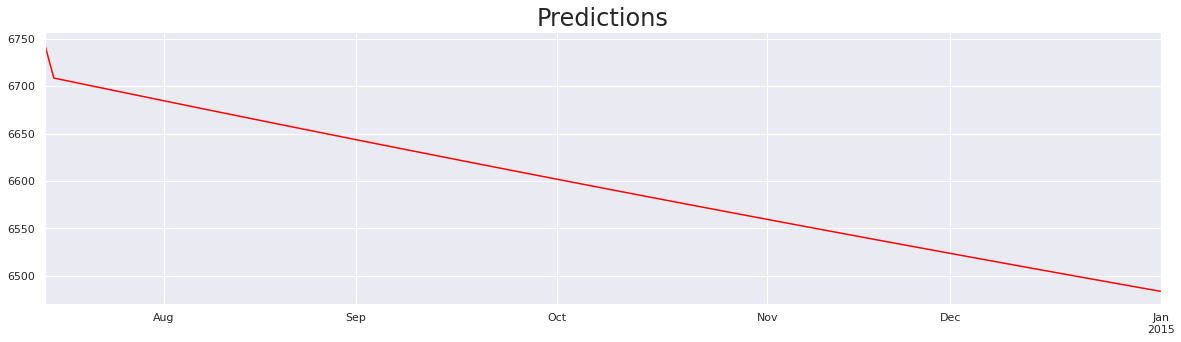

In [28]:
df_pred[start_date:end_date].plot(figsize=(20,5), color="red")
plt.title("Predictions", size=24)
plt.show()

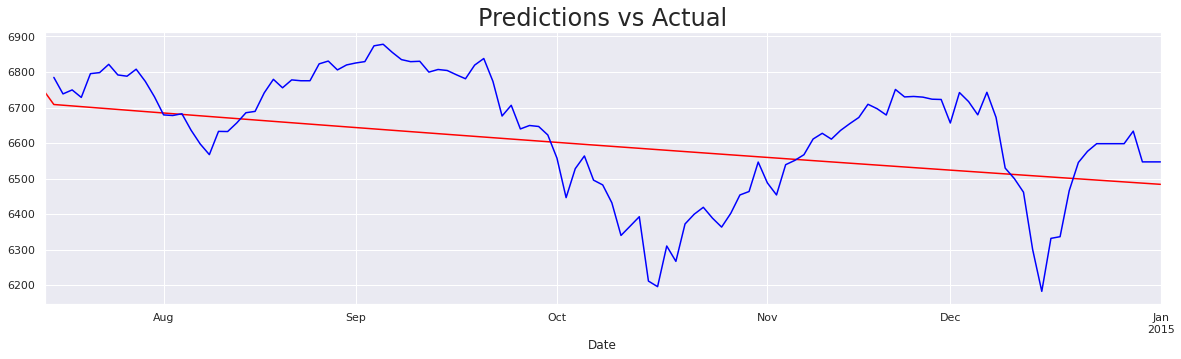

In [32]:
df_pred[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual", size=24)
plt.show()

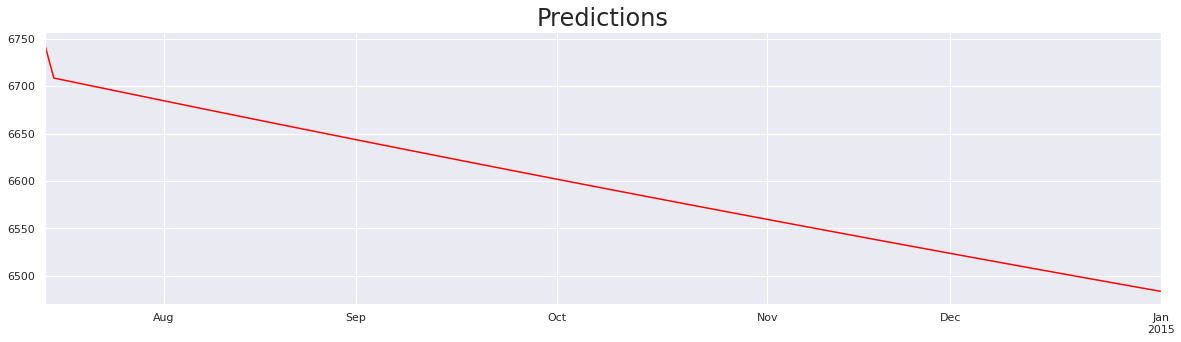

In [33]:
end_date = "2019-10-23"
df_pred[start_date:end_date].plot(figsize=(20,5), color="red")
plt.title("Predictions", size=24)
plt.show()

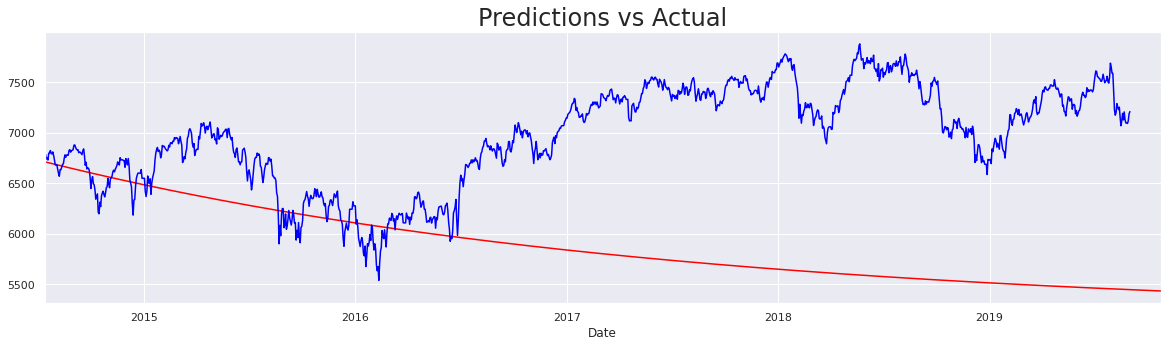

In [36]:
df_pred[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual", size=24)
plt.show()

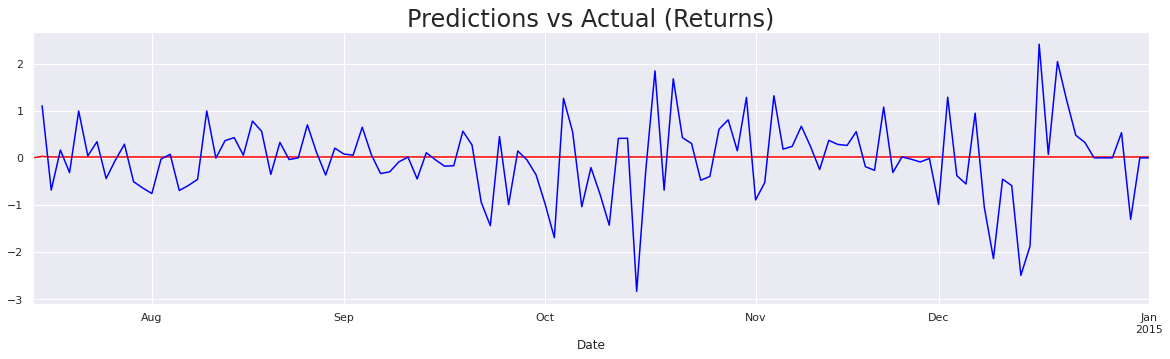

In [38]:
end_date = "2015-01-01"

model_ret_ar = ARIMA(df.ret_ftse[1:], order=(1,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start_date, end_date)

df_pred_ar[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

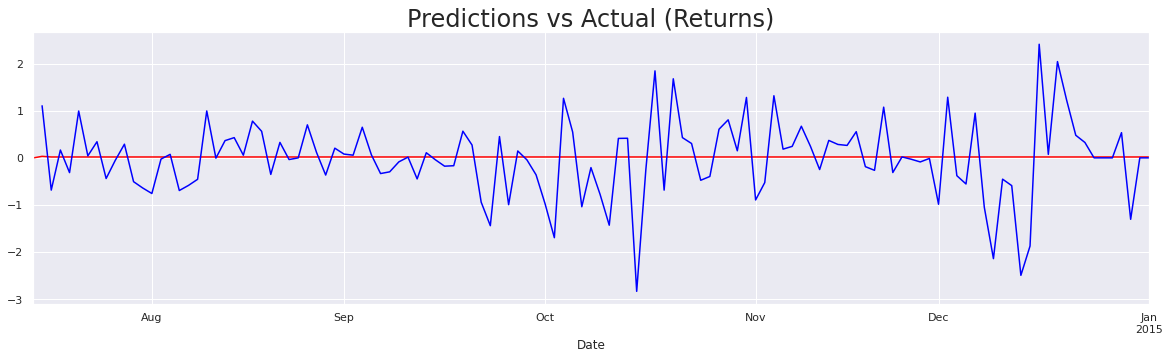

In [40]:
end_date = "2015-01-01"

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start_date, end_date)

df_pred_ma[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

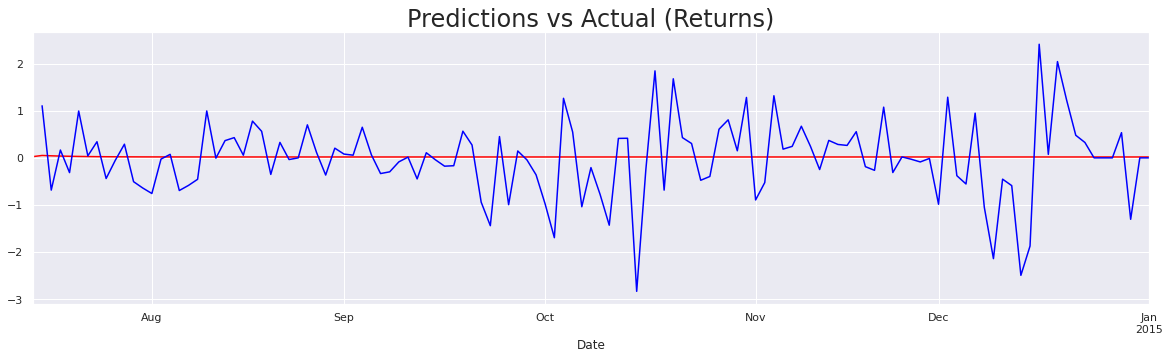

In [42]:
end_date = "2015-01-01"

model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start_date, end_date)

df_pred_arma[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

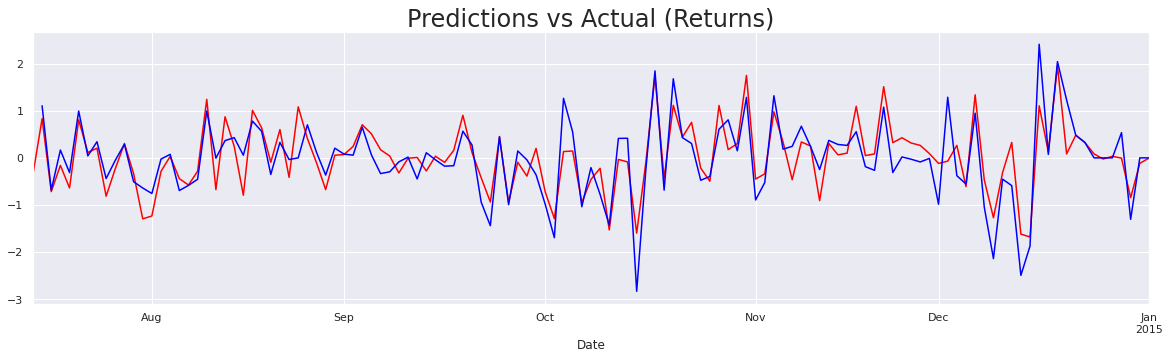

In [46]:
end_date = "2015-01-01"

model_ret_armax = ARIMA(df.ret_ftse[1:],exog=df[["ret_spx","ret_dax","ret_nikkei"]][1:], order=(1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start_date, end_date, exog=df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date])

df_pred_armax[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

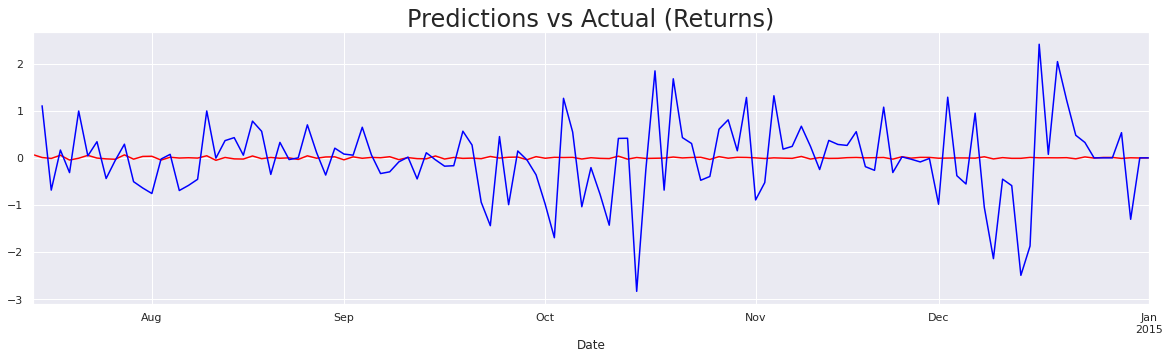

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

end_date = "2015-01-01"

model_ret_sarma = SARIMAX(df.ret_ftse[1:], order=(3,0,4), seasonal_order=(3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start_date, end_date)

df_pred_sarma[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

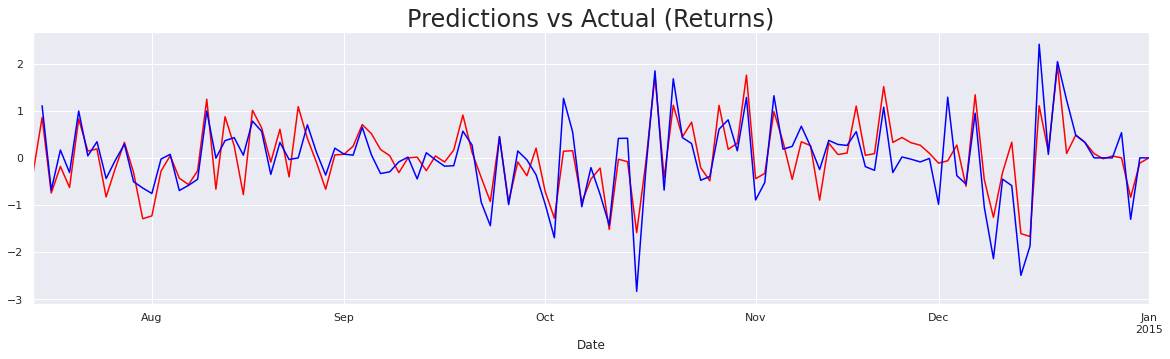

In [49]:
end_date = "2015-01-01"

model_ret_sarimax = SARIMAX(df.ret_ftse[1:],exog=df[["ret_spx","ret_dax","ret_nikkei"]][1:], order=(3,0,4), seasonal_order=(3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start_date, end_date, exog=df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date])

df_pred_sarimax[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

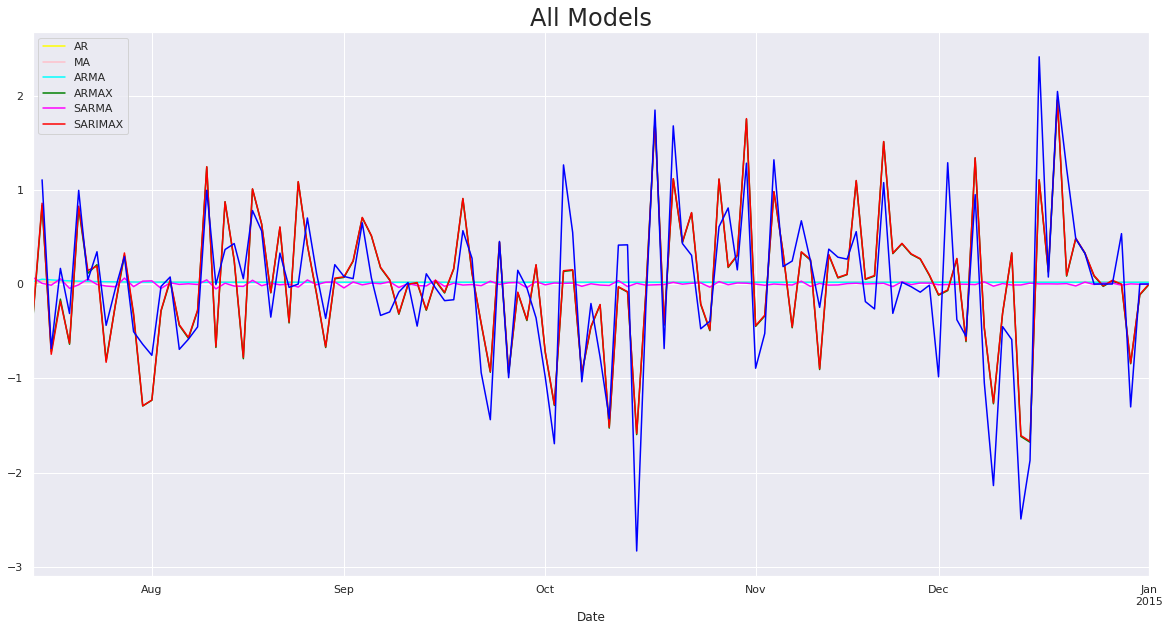

In [51]:
end_date = "2015-01-01"

df_pred_ar[start_date:end_date].plot(figsize=(20,10), color="yellow")
df_pred_ma[start_date:end_date].plot(color="pink")
df_pred_arma[start_date:end_date].plot(color="cyan")
df_pred_armax[start_date:end_date].plot(color="green")
df_pred_sarma[start_date:end_date].plot(color="magenta")
df_pred_sarimax[start_date:end_date].plot(color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")

plt.legend(["AR", "MA", "ARMA", "ARMAX", "SARMA", "SARIMAX"])

plt.title("All Models", size=24)
plt.show()

In [52]:
mod_garch = arch_model(df_comp.ret_ftse[1:], vol="GARCH", p=1, q=1, mean="constant", dist="normal")
res_garch = mod_garch.fit(last_obs=start_date, update_freq=10)

Iteration:     10,   Func. Count:     74,   Neg. LLF: 7310.1880654267625
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7310.187341157432
            Iterations: 12
            Function evaluations: 86
            Gradient evaluations: 12


In [0]:
pred_garch = res_garch.forecast(horizon=1, align='target')

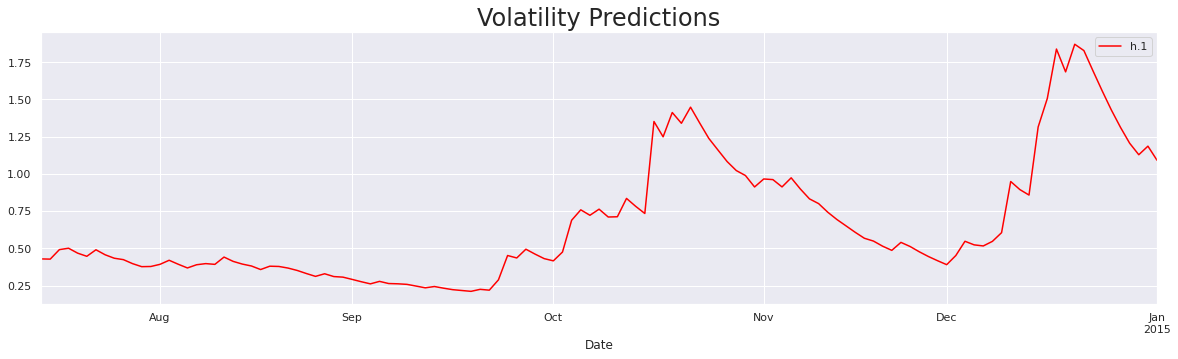

In [54]:
pred_garch.residual_variance[start_date:end_date].plot(figsize=(20, 5), color="red")
plt.title("Volatility Predictions", size=24)
plt.show()

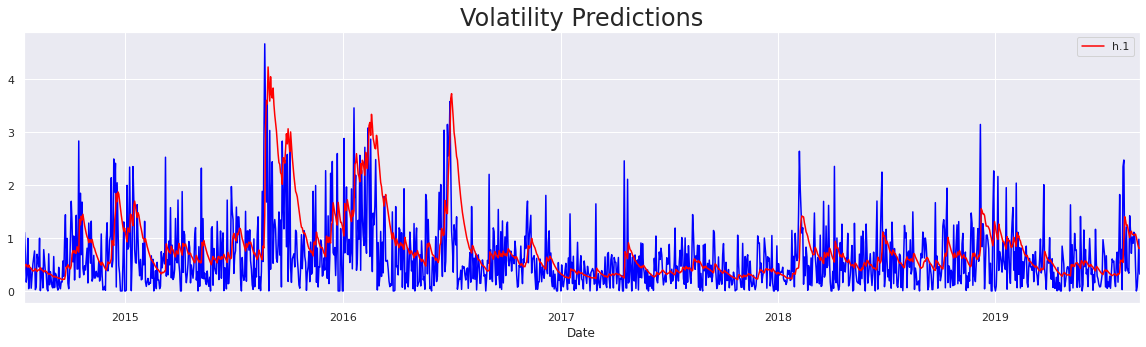

In [56]:
pred_garch.residual_variance[start_date:].plot(figsize=(20, 5), color="red",zorder=2)
df_test.ret_ftse.abs().plot(color="blue", zorder=1)
plt.title("Volatility Predictions", size=24)
plt.show()

In [0]:
from statsmodels.tsa.api import VAR

In [0]:
df_ret = df[["ret_spx", "ret_dax", "ret_ftse", "ret_nikkei"]][1:]

In [0]:
model_var_ret = VAR(df_ret)
model_var_ret.select_order(20)
results_var_ret = model_var_ret.fit(ic="aic")

In [60]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Mar, 2020
Time:                     19:43:54
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.330716
Nobs:                     5346.00    HQIC:                  0.263399
Log likelihood:          -30866.1    FPE:                    1.25516
AIC:                     0.227263    Det(Omega_mle):         1.23563
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.039150         0.016160            2.423           0.015
L1.ret_spx           -0.110568         0.017558           -6.297           0.000
L1.ret_dax            0.065289         0.019034           

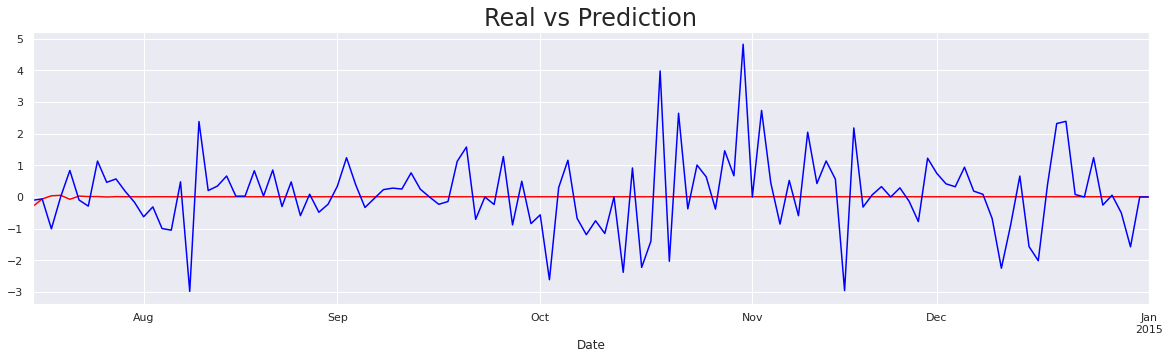

In [63]:
lag_order_ret = results_var_ret.k_ar
var_pred_ret = results_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))
df_ret_pred = pd.DataFrame(data=var_pred_ret, index=df_test[start_date:end_date].index, columns=df_test[start_date:end_date].columns[4:8])
df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize=(20,5), color="red")
df_test.ret_nikkei[start_date:end_date].plot(color="blue")
plt.title("Real vs Prediction", size=24)
plt.show()

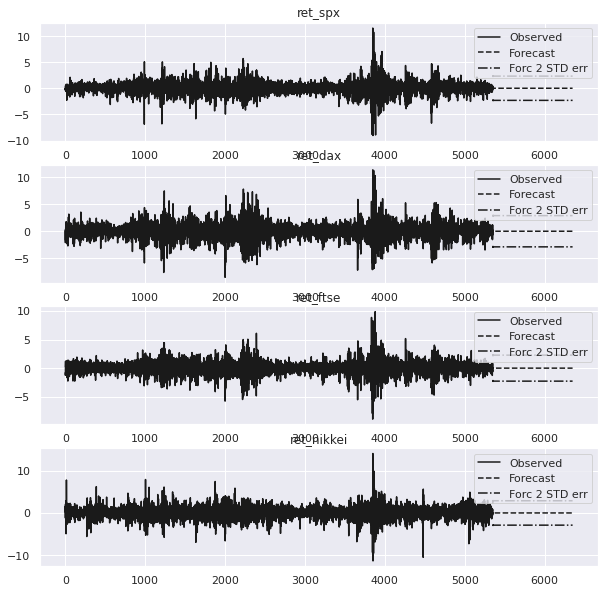

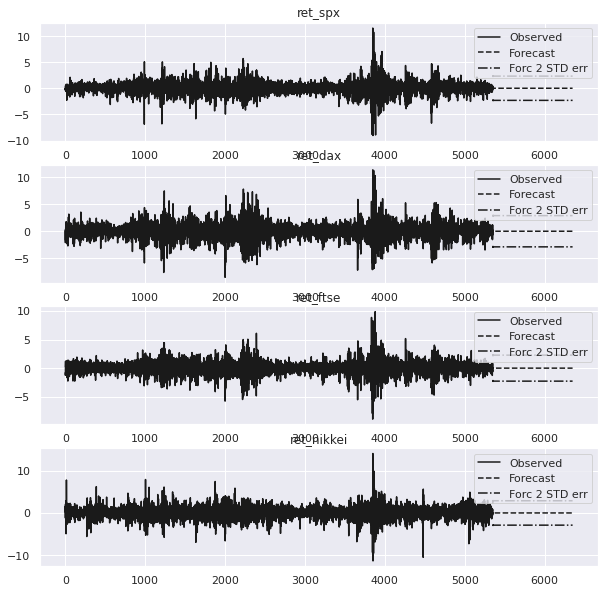

In [64]:
results_var_ret.plot_forecast(1000)